# Análise de sobrevivência - Pense Estatística, 2º Edição.

## Universidade Federal de Alagoas - UFAL
## Centro de Tecnologia - CTEC
## Programa de Pós-Graduação Recursos Hídricos e Saneamento - PPGRHS
### Disciplina de Estatística

Clebson Farias

In [2]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random

import thinkstats2
import thinkplot

A **análise de sobrevivência** é uma forma de descrever quanto tempo as coisas duram.
- Estudar vidas humanas;
- Sobrevivência de componentes mecânicos e eletrônicos;
- **Intervalos no tempo** antes de um evento.

## Curvas de sobrevivência

Fundamental para análise de sobrevivência;
Sua função mapeia desde a duração, t, até à probabilidade de sobrevivência ser superior a t;
A curva de sobrevivência é o complemento da CDF (distribuição da duração); 
\begin{equation}
    S(t) = 1 - CDF(t)
\end{equation}
- $S(t)$ é Curva de sobrevivência
- $CDF(t)$ é a probabilidade de um tempo de vida inferior ou igual a t.

In [3]:
dados = pd.read_csv("manso.csv", index_col=0, parse_dates=True, )
dados.rename(index=str, 
             columns={"1455008": "COIMBRA_P", "66210000": "MANSO_JUS", "66231000": "COIMBRA_F"}, 
             inplace=True)
dados.index = pd.to_datetime(dados.index, errors='coerce')
dados.head()

,COIMBRA_P,MANSO_JUS,COIMBRA_F,MANSO
1931-01-01,NaN,NaN,NaN,NaN
1931-01-02,NaN,NaN,NaN,NaN
1931-01-03,NaN,NaN,NaN,NaN
1931-01-04,NaN,NaN,NaN,NaN
1931-01-05,NaN,NaN,NaN,NaN


In [4]:
date_start = pd.to_datetime("01/01/1982", dayfirst=True)
date_end = pd.to_datetime("31/12/1986", dayfirst=True)
dados_nat = dados.MANSO.loc[date_start:date_end]
dados_nat.head()

1982-01-01    243.0
1982-01-02    329.0
1982-01-03    290.0
1982-01-04    300.0
1982-01-05    386.0
Name: MANSO, dtype: float64

In [5]:
import survival
cdf_nat = thinkstats2.Cdf(dados_nat, label='cdf')
sf = survival.MakeSurvivalFromCdf(cdf_nat, label='survival')
sf[328]
print('CDF:', cdf_nat[329], '\nSF:', sf[329])

CDF: 0.8773274917853231 
SF: 0.1226725082146769


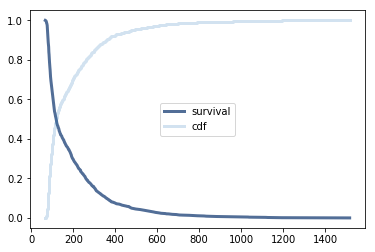

In [6]:
thinkplot.Plot(sf)
thinkplot.Cdf(cdf_nat, alpha=0.2)
thinkplot.Config(loc='center')

## Função de perigo

A partir da curva de sobrevivência podemos derivar a função de perigo;

\begin{equation}
    \lambda(t) = \frac{S(t)-S(t+1)}{S(t)}
\end{equation}

$PMF(t) = S(t)-S(t+1)$



Função de perigo modela quais períodos têm as maiores ou menores chances de um evento;

In [17]:
hf = sf.MakeHazardFunction(label='hazard')
hf[1157]

0.24999999999996197

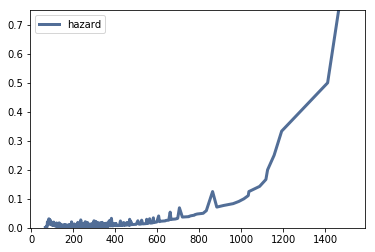

In [13]:
thinkplot.Plot(hf)
thinkplot.Config(ylim=[0, 0.75], loc='upper left')

## Inferir curvas de sobrevivência

## Estimativa de Kaplan-Meier

A ideia geral é que podemos usar os dados para estimar a **função hazard**, depois **converter** a função hazard numa **curva de sobrevivência**.

In [37]:
from collections import Counter

cheia = dados_nat[dados_nat >= 500]
seca = dados_nat[dados_nat < 500]
hf1 = survival.EstimateHazardFunction(cheia, seca)

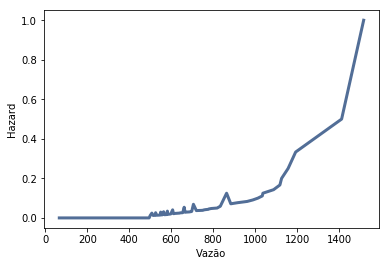

In [38]:
thinkplot.Plot(hf1)
thinkplot.Config(xlabel='Vazão',
                 ylabel='Hazard')

## Estimando a curva de sobrevivência

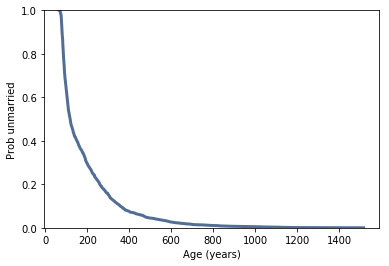

In [27]:
sf = hf.MakeSurvival()
thinkplot.Plot(sf)
thinkplot.Config(xlabel='Age (years)',
                 ylabel='Prob unmarried',
                 ylim=[0, 1])

## Intervalos de confiança

## Efeitos de coorte

## Extrapolação

## Vida útil restante esperada